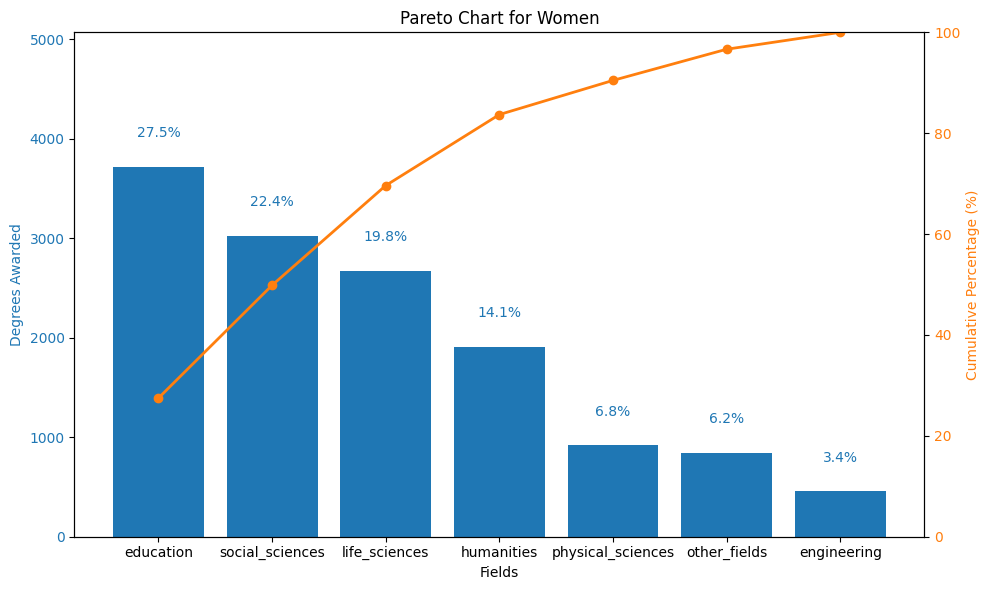

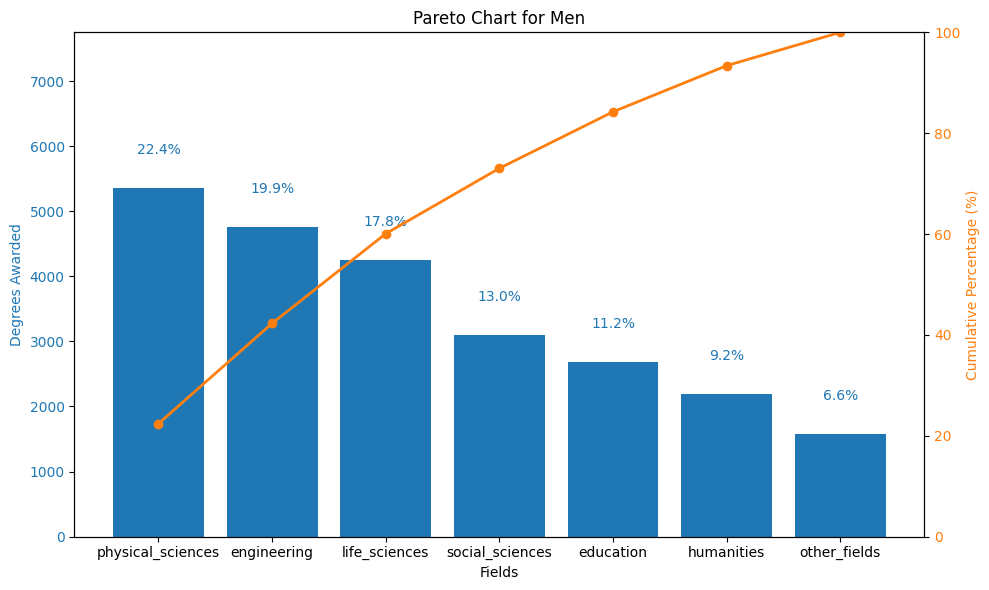

In [12]:
import matplotlib.pyplot as plt

total_degrees = {
    'physical_sciences': 6276,
    'engineering': 5212,
    'life_sciences': 6928,
    'social_sciences': 6127,
    'humanities': 4094,
    'education': 6397,
    'other_fields': 2417
}

percent_women = {
    'physical_sciences': 14.6,
    'engineering': 8.7,
    'life_sciences': 38.6,
    'social_sciences': 49.4,
    'humanities': 46.5,
    'education': 58.1,
    'other_fields': 34.6
}

degrees_women = {field: (total_degrees[field] * percent_women[field]) / 100 for field in total_degrees}
degrees_men = {field: total_degrees[field] - degrees_women[field] for field in degrees_women}

sorted_degrees_women = dict(sorted(degrees_women.items(), key=lambda item: item[1], reverse=True))
sorted_degrees_men = dict(sorted(degrees_men.items(), key=lambda item: item[1], reverse=True))

def plot_pareto(degrees, title):
    fields = list(degrees.keys())
    values = list(degrees.values())
    total = sum(values)
    percentages = [(value / total) * 100 for value in values]
    cumulative_percentages = [sum(percentages[:i+1]) for i in range(len(percentages))]

    fig, ax1 = plt.subplots(figsize=(10, 6))

    bars = ax1.bar(fields, values, color='C0')
    ax1.set_xlabel('Fields')
    ax1.set_ylabel('Degrees Awarded', color='C0')
    ax1.tick_params(axis='y', labelcolor='C0')
    ax1.set_title(title)

    ax1.set_ylim(0, max(values) + 0.1 * total)

    ax2 = ax1.twinx()
    ax2.plot(fields, cumulative_percentages, color='C1', marker='o', linestyle='-', linewidth=2)
    ax2.set_ylabel('Cumulative Percentage (%)', color='C1')
    ax2.tick_params(axis='y', labelcolor='C1')
    ax2.set_ylim(0, 100)
    for bar in bars:
        height = bar.get_height()
        ax1.text(bar.get_x() + bar.get_width() / 2., height + 0.02 * total, f"{(height / total) * 100:.1f}%",
                 ha='center', va='bottom', color='C0')

    fig.tight_layout()

    plt.show()

# Plotting Pareto charts
plot_pareto(sorted_degrees_women, 'Pareto Chart for Women')
plot_pareto(sorted_degrees_men, 'Pareto Chart for Men')